# Interpolación cuadrática.

**Objetivo general.** Revisar e implementar una interpolación cuadrática y aplicarlas a datos reales.


 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import macti.visual as mvis

## Ejemplo simple.

La interpolación lineal descrita en la notebook [01_interpolacion_lineal.ipynb](01_interpolacion_lineal.ipynb) no parece ser muy efectiva, a menos que se tenga mucha información. 

Una forma de mejorar es mediante el uso de polinomios de más alto orden. Por ejemplo un polinomio cuadrático:

$$
S(x) = a + b x + c x^2
$$

Consideremos el siguiente ejemplo:

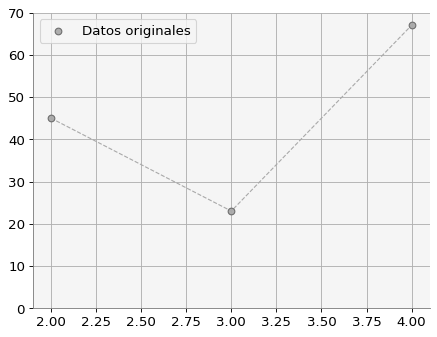

In [2]:
x0, x1, x2 = 2, 3, 4
f0, f1, f2 = 45, 23, 67

# Graficación de los datos 
plt.scatter([x0, x1, x2], [f0, f1, f2], 
            ec='dimgray', fc='darkgray', alpha=0.95, zorder=5, 
            label='Datos originales')
# Líneas que unen a los datos
plt.plot([x0, x1, x2], [f0, f1, f2], '--', color='darkgray', lw = 1.0)

plt.ylim(0,70)
plt.legend()
plt.grid()
plt.show()

## Construcción de una función cuadrática

Si evaluamos la función cuadrática en cada uno de los tres puntos obtenemos:

$$
\begin{eqnarray}
S(x_0) & = & a + b x_0 + c x_0^2 \\
S(x_1) & = & a + b x_1 + c x_1^2\\
S(x_2) & = & a + b x_2 + c x_2^2
\end{eqnarray}
$$

Tenemos entonces un sistema de ecuaciones que debemos resolver para encontrar $a$, $b$ y $c$:

$$
\left[
\begin{array}{ccc}
1 & x_0 & x_0^2 \\
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2
\end{array}
\right] 
\left[
\begin{array}{c}
a \\ b \\ c
\end{array}
\right]
= 
\left[
\begin{array}{c}
f(x_0) \\ f(x_1) \\ f(x_2)
\end{array}
\right]
$$

La matriz del lado izquierda suele conocerse como [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).

De acuerdo con los datos definidos antes (`x0`, `f0`), (`x1`, `f1`) y (`x2`, `f2`) podemos
definir la matriz y el lado derecho (RHS) del sistema lineal como sigue:

In [3]:
A = np.array([[1, x0, x0**2],
              [1, x1, x1**2],
              [1, x2, x2**2]])

RHS = np.array([f0,f1,f2])

print(f"Matriz: \n{A}")
print(f"RHS: \n{RHS}")

Matriz: 
[[ 1  2  4]
 [ 1  3  9]
 [ 1  4 16]]
RHS: 
[45 23 67]


Para resolver este sistema y encontrar los coeficientes ($a, b, c$) del polinomio cuadrático usamos la función [`np.linalg.solve()`](https://numpy.org/doc/2.2/reference/generated/numpy.linalg.solve.html):

In [4]:
sol = np.linalg.solve(A, RHS)
print(f"Coeficientes: \n{sol}")

Coeficientes: 
[ 287. -187.   33.]


Implementamos la función cuadrática:

In [5]:
S_q = lambda x, a, b, c: a  + b * x + c * x**2

Evaluamos la función cuadrática en un punto:

In [6]:
# Renombramos los coeficientes por facilidad de uso
a, b, c = sol[0], sol[1], sol[2] 

# Realizamos la interpolación cuadrática
x = 2.5
y = S_q(x, a, b, c)
print(f"Resultado de la interpolación cuadrática: {y}")

Resultado de la interpolación cuadrática: 25.75


Graficamos el resultado:

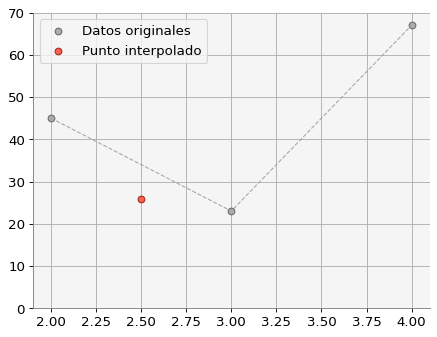

In [7]:
# Graficación de los datos 
plt.scatter([x0, x1, x2], [f0, f1, f2], 
            ec='dimgray', fc='darkgray', alpha=0.95, zorder=5, 
            label='Datos originales')
# Líneas que unen a los datos
plt.plot([x0, x1, x2], [f0, f1, f2], '--', color='darkgray', lw = 1.0)

# Datos interpolados
plt.scatter(x, y, ec='brown', fc='tomato', zorder=5, 
            label='Punto interpolado') 

plt.ylim(0,70)
plt.legend()
plt.grid()
plt.show()

Sería bueno graficar la función cuadrática en vez de las líneas rectas:

In [8]:
# Primero construimos la cuadrática con 50 puntos
xq = np.linspace(2,4,50)
yq = S_q(xq, a, b, c)

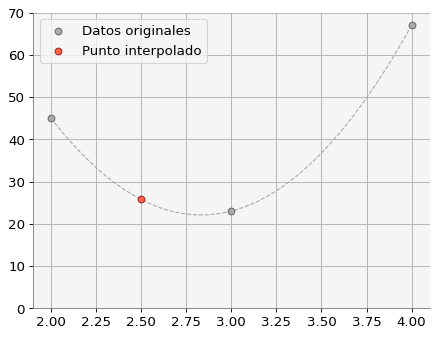

In [9]:
# Graficación de los datos 
plt.scatter([x0, x1, x2], [f0, f1, f2], 
            ec='dimgray', fc='darkgray', alpha=0.95, zorder=5, 
            label='Datos originales')
# Curva cuadrática que une a los datos
plt.plot(xq, yq, '--', color='darkgray', lw = 1.0)

# Datos interpolados
plt.scatter(x, y, ec='brown', fc='tomato', zorder=5, 
            label='Punto interpolado') 

plt.ylim(0,70)
plt.legend()
plt.grid()
plt.show()

## Aplicación a un punto del ejemplo real.

Retomando el ejemplo del artículo:

<blockquote cite="https://doi.org/10.1016/j.jvolgeores.2015.09.019">
    Canet, Carles <i>et al</i>. (<b>2015</b>). Thermal history of the Acoculco geothermal system, eastern Mexico: Insights from numerical modeling and radiocarbon dating. <i>Journal of Volcanology and Geothermal Research</i>. <b>305<b>. https://doi.org/10.1016/j.jvolgeores.2015.09.019
</blockquote>
        
Leemos el conjunto de datos y los graficamos:

In [10]:
datos = pd.read_csv('T_inicial.csv')
datos

,Depth,Temp
0,0,15
1,100,113
2,200,145
3,400,178
4,710,155
5,803,201
6,1100,215
7,1200,282
8,1400,223
9,1500,226


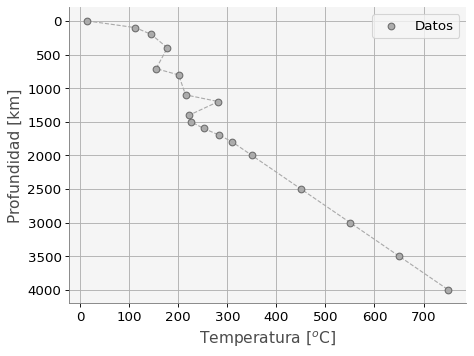

In [11]:
# Graficación de los datos 
plt.scatter(datos.Temp, datos.Depth, label='Datos',
            ec='dimgrey', fc='darkgrey', alpha=0.95, zorder=5, )
# Líneas que unen a los datos
plt.plot(datos.Temp, datos.Depth, 
         '--', color='darkgrey', lw = 1.0)

plt.gca().invert_yaxis() # Invertimos el eje y
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()


Necesitamos seleccionar tres pares del conjunto de datos, por ejemplo:

In [12]:
datos.loc[6:8]

,Depth,Temp
6,1100,215
7,1200,282
8,1400,223


Con estos datos haremos una interpolación cuadrática, por ejemplo en el punto $1350$.

In [13]:
# Obtenemos los datos del DataFrame
x0, f0 = datos.iloc[6,0], datos.iloc[6,1]
x1, f1 = datos.iloc[7,0], datos.iloc[7,1]
x2, f2 = datos.iloc[8,0], datos.iloc[8,1]

A = np.array([[1, x0, x0**2],
              [1, x1, x1**2],
              [1, x2, x2**2]])
RHS = np.array([f0,f1,f2])
sol = np.linalg.solve(A,RHS)

a, b, c = sol[0], sol[1], sol[2]
xj = 1350 # Punto para donde se hará la interpolación
yj = S_q(xj, a, b, c)
print(f"Resultado de la interpolación: {yj}")

Resultado de la interpolación: 261.8750000000009


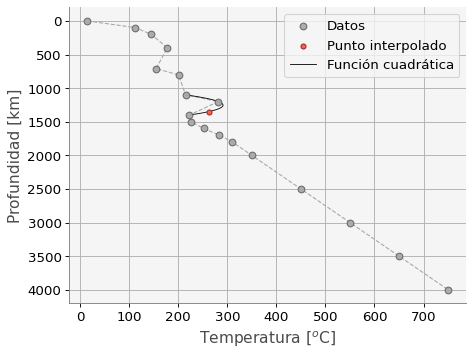

In [14]:
# Graficación de los datos 
plt.scatter(datos.Temp, datos.Depth, label='Datos',
            ec='dimgrey', fc='darkgrey', alpha=0.95, zorder=5, )
# Líneas que unen a los datos
plt.plot(datos.Temp, datos.Depth, 
         '--', color='darkgrey', lw = 1.0)

# Datos interpolados
plt.scatter(yj, xj, ec='brown', fc='tomato', s = 20, zorder=5, 
            label='Punto interpolado') 

# Gráfica de la función cuadrática
xq = np.linspace(1100,1400,50)
yq = S_q(xq, a, b, c)
plt.plot(yq, xq, lw = 0.75, c='k', label="Función cuadrática")

plt.gca().invert_yaxis() # Invertimos el eje y
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

**¿Qué opinas de esta interpolación**

## Aplicación a todo el conjunto de datos

Supongamos que deseamos conocer la temperatura en $100$ puntos de profundidad igualmente espaciados desde $0$ a $4000$ metros. Podemos realizar la interpolación usando funciones cuadráticas entre cada par de datos. Para ello es conveniente construir una función que genere todos los puntos de interpolación. Esta función se muestra en la siguiente celda. La explicación del algoritmo se muestra en la sección
**Algoritmo de interpolación cuadrática** de esta notebook.

In [15]:
def cuadratica(x, f, z):
    """
    Parameters:
    x: Arreglo de datos
    f: Arreglo de datos correspondientes con el arreglo x
    Z: Arreglo de datos donde se desea interpolar.
    """

    k = len(x)-1  # Número de intervalos 
    N = 3*k       # Tamaño del sistema lineal
    # Matriz de tamaño N = 3*k para almacenar los coeficientes del sistema de ecuaciones
    A = np.zeros((N, N))
    
    # Condición de igualdad en puntos internos
    for i in range(k):
        A[2*i    , 3*i]     = 1         # a_i
        A[2*i    , 3*i + 1] = x[i]      # b_i
        A[2*i    , 3*i + 2] = x[i]**2   # c_i
        A[2*i + 1, 3*i]     = 1         # a_i+1
        A[2*i + 1, 3*i + 1] = x[i+1]    # b_i+1
        A[2*i + 1, 3*i + 2] = x[i+1]**2 # c_i+1
    
    # Condición de continuidad de las derivadas en puntos internos
    for i in range(k - 1):
        A[2*k + i, 3*i + 1] =  1            # b_i
        A[2*k + i, 3*i + 2] =  2 * x[i + 1] # c_i
        A[2*k + i, 3*i + 4] = -1            # b_i+1
        A[2*k + i, 3*i + 5] = -2 * x[i + 1] # c_i+1        
    A[3*k - 1, 2] = 2 # c_0 (Segunda derivada)

    # Lado derecho del sistema
    RHS = np.zeros(N)
    # Asignamos los valores de f(x)
    RHS[0] = f[0]
    for i in range(1, 2*k - 1, 2):
        RHS[i] = f[(i + 1)//2]
        RHS[i + 1] = f[(i + 1)//2]
    RHS[2*k - 1] = f[k]
    
    # Resolvemos el sistema 
    sol = np.linalg.solve(A, RHS)
    
    # Renombramos los coeficientes para un mejor entendimiento
    a = sol[::3]
    b = sol[1::3]
    c = sol[2::3]

    # Arreglo para almacenar la interpolación
    y = np.zeros_like(z)

    # Recorremos todos los datos z
    for j, xj in enumerate(z):
        # Por cada intervalo se hace la interpolación cuadrática
        for i in range(k):
            if xj >= x[i] and xj <= x[i + 1]:
                # Calculo de la interpolación cuadrática
                y[j] = S_q(xj, a[i], b[i], c[i])
                break
                
    return y # Regresamos las interpolaciones  

In [16]:
L = max(datos.Depth)        # Profundidad máxima
N = 99                      # Número de incógnitas
z = np.linspace(0, L, N+2)  # Coordenada z de la profundidad
yint= cuadratica(datos.Depth, datos.Temp, z) # Interpolación cuadrática

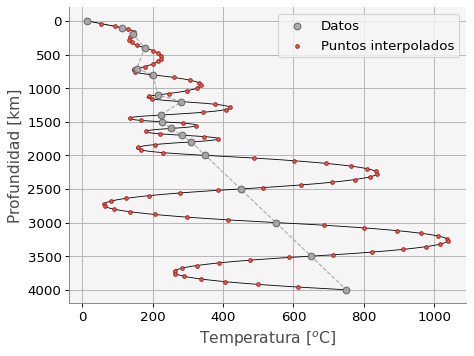

In [17]:
# Graficación de los datos 
plt.scatter(datos.Temp, datos.Depth, label='Datos',
            ec='dimgrey', fc='darkgrey', alpha=0.95, zorder=5, )
# Líneas que unen a los datos
plt.plot(datos.Temp, datos.Depth, 
         '--', color='darkgrey', lw = 1.0)

# Datos interpolados
plt.scatter(yint, z, ec='brown', fc='tomato', s = 10, zorder=3, 
            label='Puntos interpolados') 

# Gráfica de la función cuadrática
xq = np.linspace(0,4000,1000)
yq = cuadratica(datos.Depth, datos.Temp, xq) 
plt.plot(yq, xq, lw = 0.75, c='k')

plt.gca().invert_yaxis()
plt.xlabel('Temperatura [$^o$C]')
plt.ylabel('Profundidad [km]')
plt.legend()
plt.grid()
plt.show()

Con base en este resultado:

* ¿Qué opinas de esta interpolación?
* ¿Es correcta numéricamente?
* ¿Reproduce la realidad?
* ¿La usarías en algún proyecto? ¿Por qué?
* ¿Cómo podrías mejorar esta interpolación?

# Algoritmo de interpolación cuadrática.

Consideramos el conjunto de datos $[(x_0, f(x_0), \dots (x_k, f(x_k)]$. Esto genera $k$ intervalos, en cada uno de los cuales se va a construir una curva cuadrática. La forma matemática de estas curvas, para el intervalo $i$ es la siguiente:

$$
S_i(x) = a_i + b_i x + c_i x^2 \;\;\; \text{para} \;\;\; x \in [x_{i}, x_{i+1}] \;\;\; \text{con} \;\;\; i = 0, k-1
$$

En total se tienen $k$ ecuaciones, lo que nos da un total de $3*k$ coeficientes por calcular. Además se deben cumplir las siguientes condiciones:

1. **Continuidad**: las curvas $S_i$ deben pasar por los puntos $(x_i, f_i)$ y $(x_{i+1}, f_{i+1})$, donde $f_i = f(x_i)$ y $f_{i+1} = f(x_{i+1}$. Esta condición implica:

$$
\begin{eqnarray}
S_i(x_i) & = & a_i + b_i x_i + c_i x_i^2 = f_i \\
S_i(x_{i+1}) & = & a_i + b_i x_{i+1} + c_i x_{i+1}^2 = f_{i+1}
\end{eqnarray}
$$

Para $i = 0, k-1$ esto nos proporciona $2k$ ecuaciones.

2. **Suavidad**: las derivadas de las $S_i(x)$ en los puntos intermedios deben ser iguales. Esto implica:

$$
S_i^{\prime}(x_{i+1}) = S_{i+1}^{\prime}(x_{i+1})
$$

Para $i = 0, k-2$ esto nos proporciona $k-1$ ecuaciones.

3. La segunda derivada de $S_0$ en el punto inicial se hace igual a cero.

$$
S_0^{\prime\prime}(x) = 2 c_0 = 0 
$$

Por lo tanto, en total se tienen $2k + (k-1) + 1 = 3k$ ecuaciones.

Con estas ecuaciones, podemos formar un sistema lineal como el siguiente:

$$
\underbrace{
\left[
\begin{array}{cccccccccccccc}
1 & x_0 & x_0^2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &\dots \\
1 & x_1 & x_1^2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &\dots \\
0 & 0 & 0 & 1 & x_1 & x_1^2 & 0 & 0 & 0 & 0 &\dots \\
0 & 0 & 0 & 1 & x_2 & x_2^2 & 0 & 0 & 0 & 0 &\dots \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & x_2 & x_2^2 & 0 &\dots \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & x_3 & x_3^2 & 0 &\dots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
0 & 1 & 2x_1 & 0 & -1 & -2x_1 & 0 & 0 & 0 & 0 & \dots \\
0 & 0 & 0 & 0 & 1 & 2x_2 & 0 & -1 & -2x_2 & 0 & \dots \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \dots
\end{array}
\right]}_{A}
\underbrace{
\left[
\begin{array}{c}
a_0 \\ b_0 \\ c_0 \\ a_1 \\ b_1 \\ c_1  \\ a_2 \\ \vdots \\ c_{k-2} \\ a_{k-1} \\ b_{k-1} \\ c_{k-1}
\end{array}
\right]}_{sol} = 
\underbrace{
\left[
\begin{array}{c}
f_0 \\ f_1 \\ f_1 \\ f_2 \\ f_2 \\ f_3 \\ f_3 \\ \vdots \\ f_k \\ 0 \\ \vdots \\ 0
\end{array}
\right]}_{RHS}
$$

La función `cuadratica(x, f, z)` lo que hace es construir este sistema lineal, resolverlo para encontrar los coeficientes $a_i$, $b_i$ y $c_i$ y realizar la interpolación.